In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# Defining required functions
def show_2_images(image1, image2, title1, title2):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title(title1)

    ax[1].imshow( image2, cmap='gray')
    ax[1].set_title(title2)

    plt.show()

def show_3_images(image1, image2, image3, title1, title2, title3):
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title(title1)

    ax[1].imshow( image2, cmap='gray')
    ax[1].set_title(title2)

    ax[2].imshow( image3, cmap='gray')
    ax[2].set_title(title3)

    plt.show()

In [128]:
# Load the image
img = plt.imread('image.jpg')

In [129]:
# Sobel Edge Detection
def sobel_edge_detection(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    
    # Apply Sobel operator in X direction
    sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
    
    # Apply Sobel operator in Y direction
    sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
    
    # Calculate the gradient magnitude
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    return magnitude

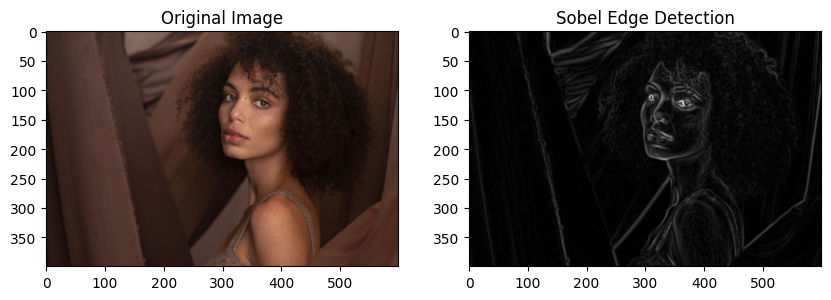

In [130]:
sobel_img = sobel_edge_detection(img)
show_2_images(img, sobel_img, 'Original Image', 'Sobel Edge Detection')

In [131]:
# Laplacian Edge Detection
def laplacian_edge_detection(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    
    # Apply Laplacian operator
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)
    
    return laplacian

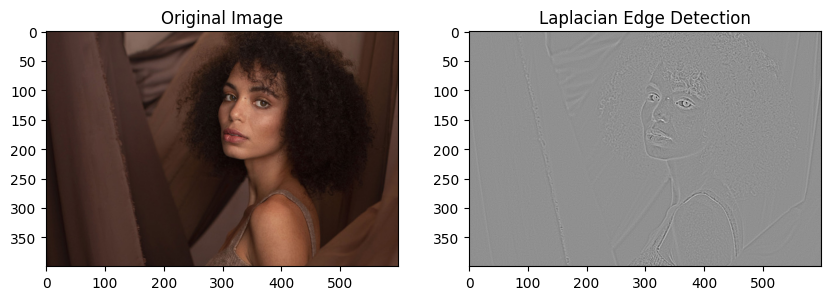

In [132]:
laplacian_img = laplacian_edge_detection(img)
show_2_images(img, laplacian_img, 'Original Image', 'Laplacian Edge Detection')

In [133]:
# Canny Edge Detection
def canny_edge_detection(img):
    
    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(img, (3, 3), 0)
    
    # Apply Canny Edge Detection
    canny = cv2.Canny(blur, 100, 150)
    
    return canny

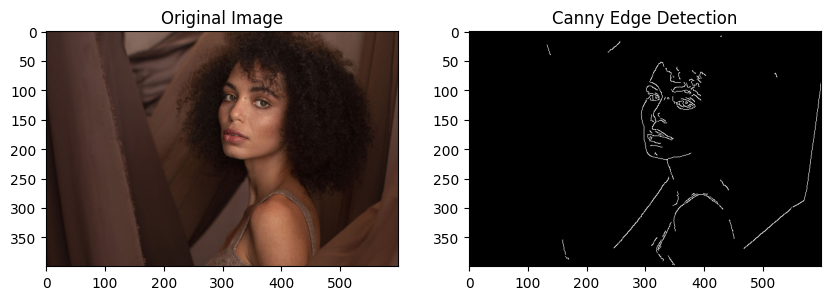

In [134]:
canny_img = canny_edge_detection(img)
show_2_images(img, canny_img, 'Original Image', 'Canny Edge Detection')

Sobel Edge Detection:

    Provides gradients in both x and y directions which can be combined.
    It is sensitive to noise and generally not as clean as Canny.
    It is useful for detecting edges in a specific orientation.

Laplacian Edge Detection:

    Highlights regions of rapid intensity change.
    Isotropic, so it detects edges regardless of orientation.
    More sensitive to noise compared to Sobel.

Canny Edge Detection:

    More sophisticated and accurate.
    Includes steps for noise reduction, making it less sensitive to noise.
    Provides thin and clean edges due to non-maximum suppression and edge tracking by hysteresis.
    It is generally preferred for its accuracy and ability to detect true edges.

In [135]:
# Load the image
image = cv2.imread('jigsaw.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the cropping coordinates
x_start, y_start, x_end, y_end = 1250, 2000, 1750, 2350

# Crop the image
cropped_image = image_rgb[y_start:y_end, x_start:x_end]

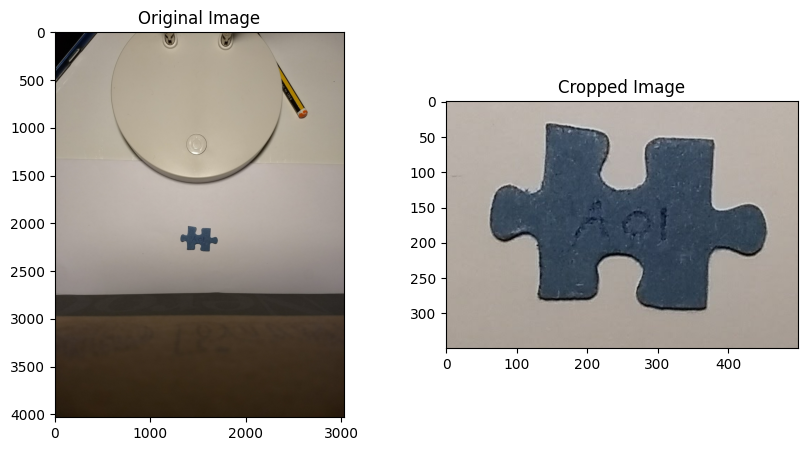

In [136]:
show_2_images(image_rgb, cropped_image, 'Original Image', 'Cropped Image')

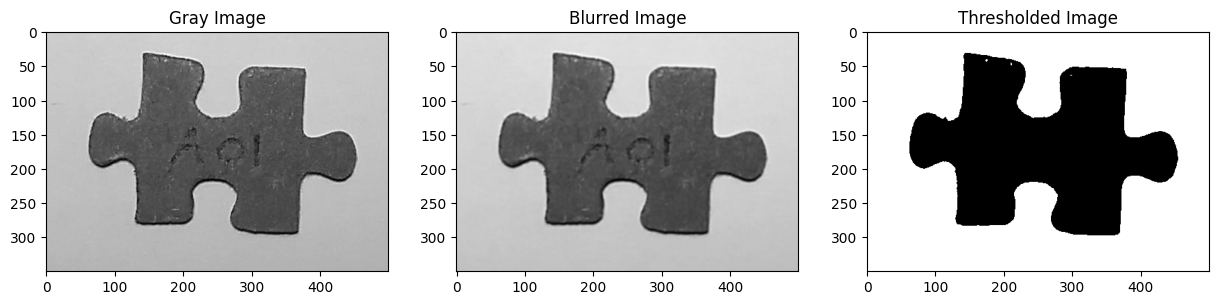

In [137]:
gray_image = cropped_image.mean(axis=2)

# Apply Gaussian Blurring
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Thresholding
_, thresholded_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

thresholded_image = thresholded_image.astype('uint8')

show_3_images(gray_image, blurred_image, thresholded_image, 'Gray Image', 'Blurred Image', 'Thresholded Image')

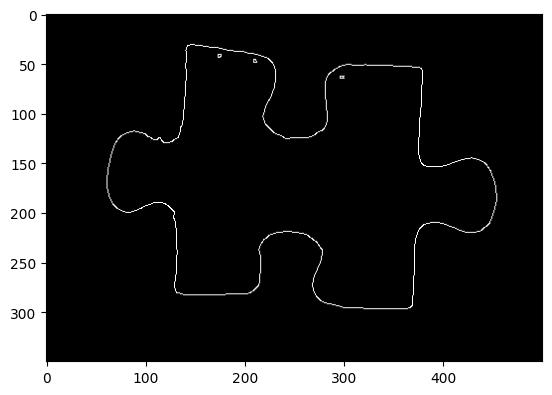

In [138]:
cannyImg = canny_edge_detection(thresholded_image)
plt.imshow(cannyImg, cmap='gray')

In [139]:
def hough_line_detection(edges, img):
    # Adjust rho, theta, and threshold parameters based on your specific image
    lines = cv2.HoughLines(edges, rho=2, theta=np.pi/360, threshold=80)

    # Draw the lines on a copy of the image
    img_copy = img.copy()
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color in BGR format

    return img_copy


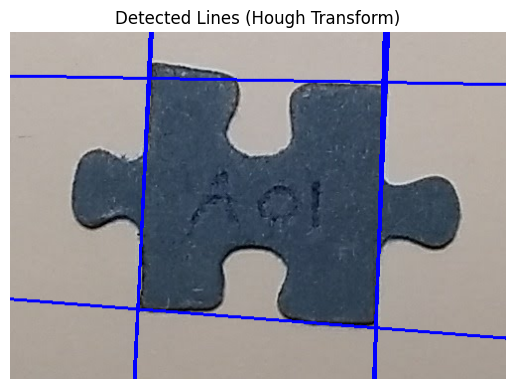

In [140]:
# Detect lines using Hough Transform
img_with_lines = hough_line_detection(cannyImg, cropped_image)

# Display the result
plt.imshow(img_with_lines, cmap='gray')
plt.title('Detected Lines (Hough Transform)')
plt.axis('off')
plt.show()

Rho (ρ) determines how finely distances are measured from the origin to detect lines. Smaller rho values give more precise results but require more computation. Larger rho values are faster but might miss details.

Theta (θ) decides the angular resolution for detecting lines of different orientations. Smaller theta values detect lines more accurately but are slower. Larger theta values are faster but might confuse lines that are nearly parallel or perpendicular.

Threshold sets the minimum votes needed in the Hough space to confirm a line. A higher threshold avoids detecting noise but might miss faint lines. A lower threshold detects more lines, including noise.

In [141]:
def apply_harris(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    harris_corners = cv2.dilate(harris_corners, None)
    img_copy = img.copy()  # Create a writable copy of the image
    img_copy[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Red color for Harris corners
    return img_copy

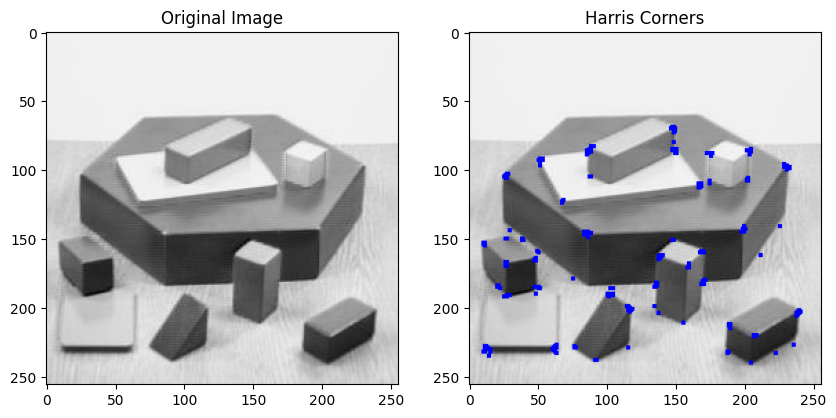

In [142]:
img = plt.imread('blox.jpg')

harris_img = apply_harris(img)
show_2_images(img, harris_img, 'Original Image', 'Harris Corners')

In [143]:
def apply_shi_tomasi(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    corners = np.intp(corners)
    img_copy = img.copy()  # Create a writable copy of the image
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(img_copy, (x, y), 3, (0, 255, 0), -1)  # Green color for Shi-Tomasi corners
    return img_copy

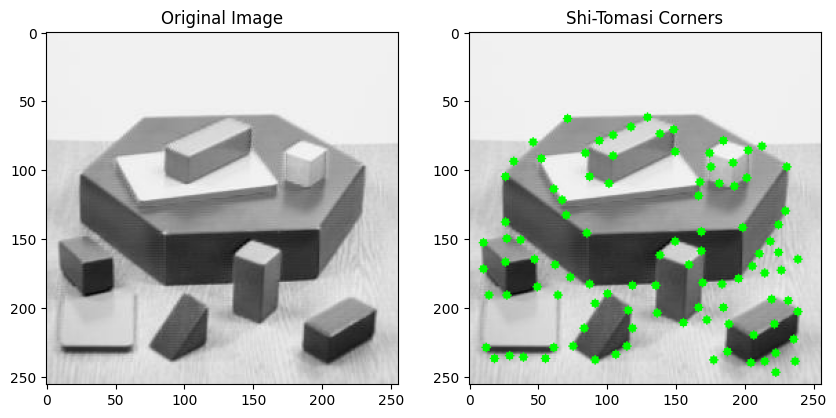

In [144]:
shi_tomasi_img = apply_shi_tomasi(img)
show_2_images(img, shi_tomasi_img, 'Original Image', 'Shi-Tomasi Corners')

In [145]:
def apply_sift(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    img_copy = img.copy()  # Create a writable copy of the image
    img_copy = cv2.drawKeypoints(img_copy, keypoints, None, color=(255, 0, 0))  # Blue color for SIFT keypoints
    return img_copy

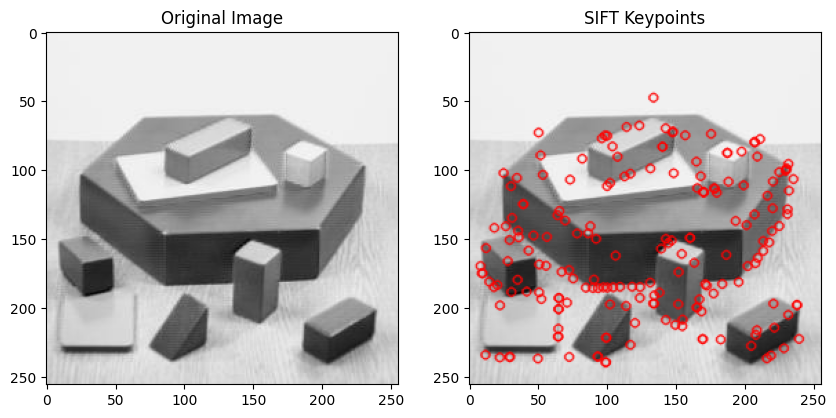

In [146]:
sift_img = apply_sift(img)
show_2_images(img, sift_img, 'Original Image', 'SIFT Keypoints')

C:\Users\pasin\AppData\Local\Temp\ipykernel_26696\2126448075.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  shi_tomasi_corners = np.int0(shi_tomasi_corners)


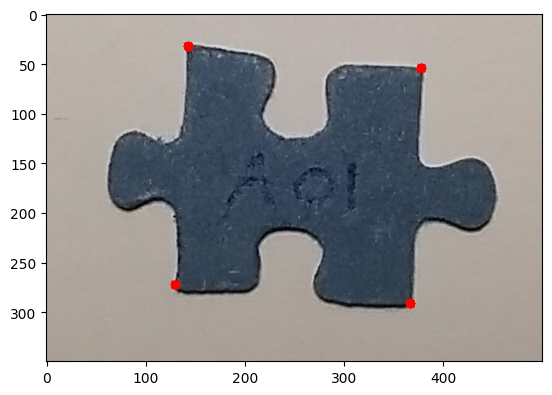

In [147]:
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Shi-Tomasi Corner Detection
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray, 10, 0.01, 10)
shi_tomasi_corners = np.int0(shi_tomasi_corners)

# Plot the results
for corner in shi_tomasi_corners:
    x = corner[0][0]
    y = corner[0][1]
    
    #filtration to get the required points only based on observation
    if x < 120 or (x>145 and x<360) or (y>100 and y<250) :
        continue
    x, y = corner.ravel()
    cv2.circle(cropped_image, (x, y), 5, 255, -1)
plt.imshow(cropped_image, cmap='gray')